### Heimy Katrin Acosta Cardenas 
### Predicción de Condicion Cardiaca con Regresión Logística


### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [51]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('heart_cleveland.csv')

In [3]:
# 1. Análisis exploratorio de datos
print(Datos.head())
print(Datos.describe())
print(Datos.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.0000

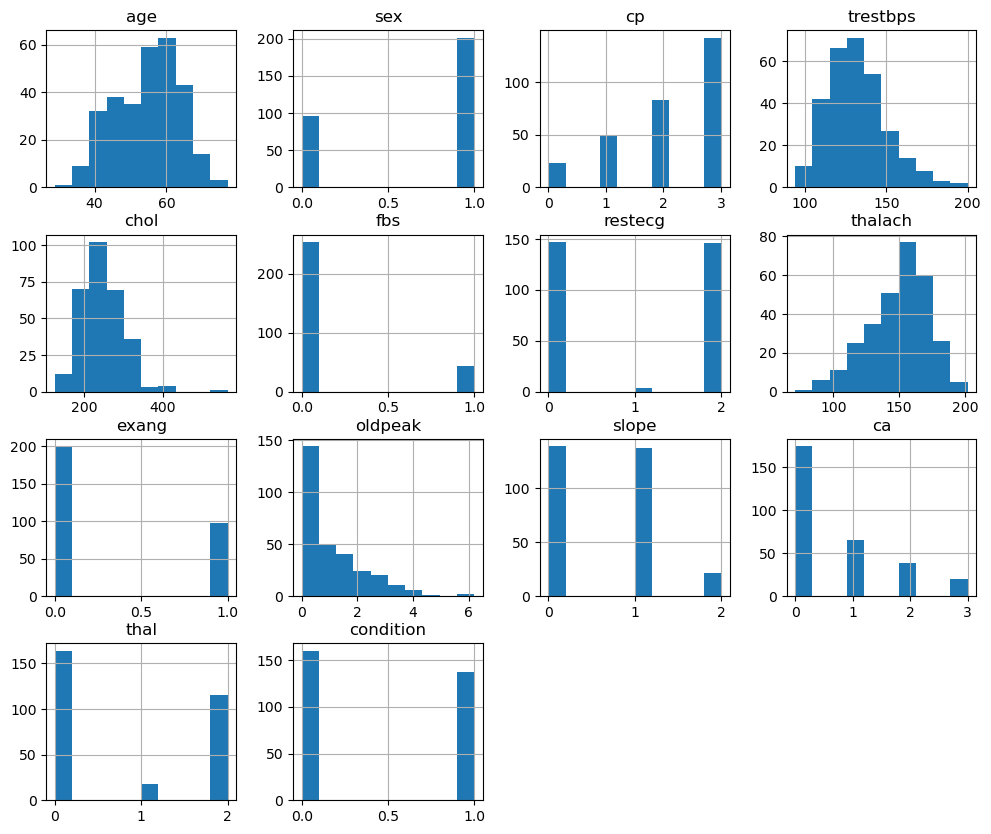

In [4]:
# Histogramas de variables numéricas
Datos.hist(figsize=(12, 10))
plt.show()

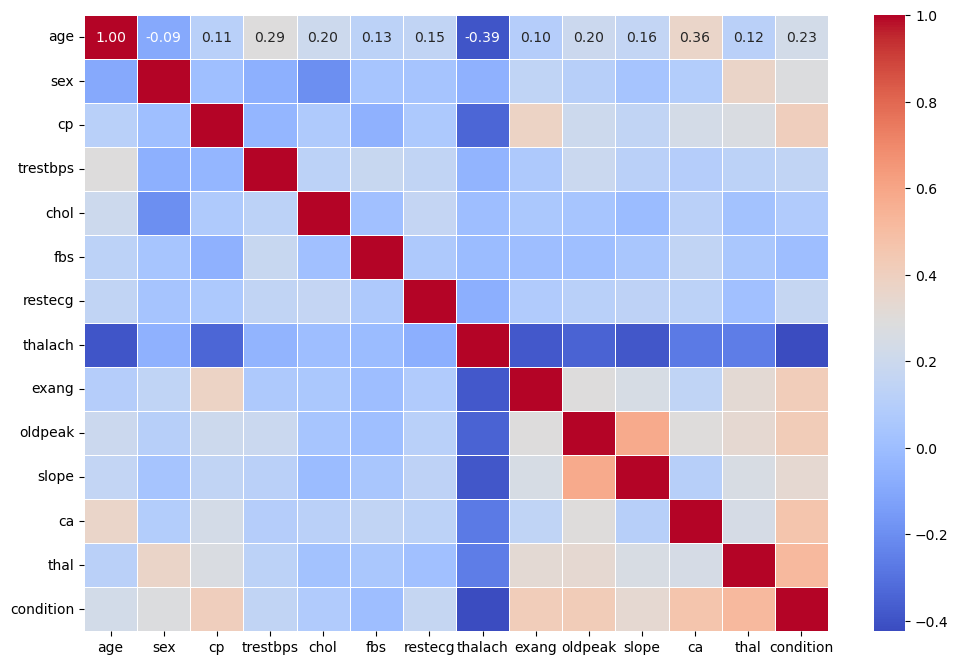

In [9]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(Datos.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [10]:
# Verificar valores faltantes en el conjunto de datos
missing_values = Datos.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

Valores faltantes por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [12]:
# Si no hay valores faltantes, imprimir un mensaje indicando que no se requiere tratamiento de valores faltantes
if missing_values.sum() == 0:
    print("No se encontraron valores faltantes en el conjunto de datos. No se necesita tratamiento de valores faltantes.")
else:
    # Si se encontraron valores faltantes, proporcionar las estrategias para manejarlos
    print("Se encontraron valores faltantes en el conjunto de datos. Se recomienda manejarlos según la estrategia apropiada.")
    # Aquí puedes incluir estrategias como eliminar filas o columnas con valores faltantes, imputar valores faltantes, etc.

No se encontraron valores faltantes en el conjunto de datos. No se necesita tratamiento de valores faltantes.


### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [28]:
# Total de personas con Diabetes

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [29]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [33]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [34]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [35]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [39]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [40]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [41]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [42]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



###  7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

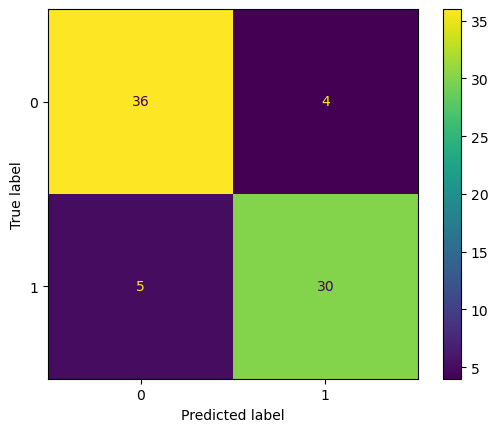

In [52]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

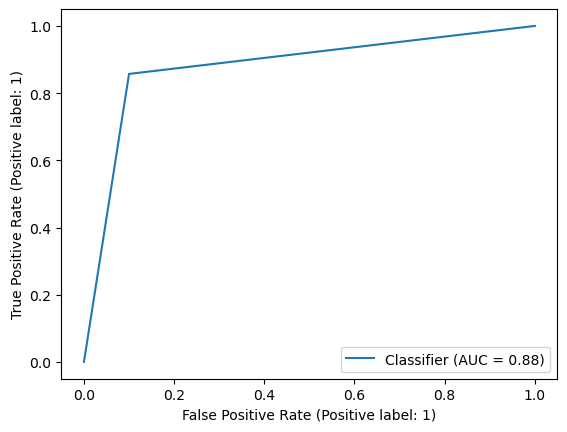

In [54]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

### 8. Interpretar, analizar y documentar los resultados obtenidos